# MNIST Dataset

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA

In [ ]:
#Load dataset MNIST
mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Dataset Size: (70000, 784)
Number of Classes: 10

Data Types:
pixel1      float64
pixel2      float64
pixel3      float64
pixel4      float64
pixel5      float64
             ...   
pixel780    float64
pixel781    float64
pixel782    float64
pixel783    float64
pixel784    float64
Length: 784, dtype: object

First Few Rows:
   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...       0.0       0.0       0.0       0

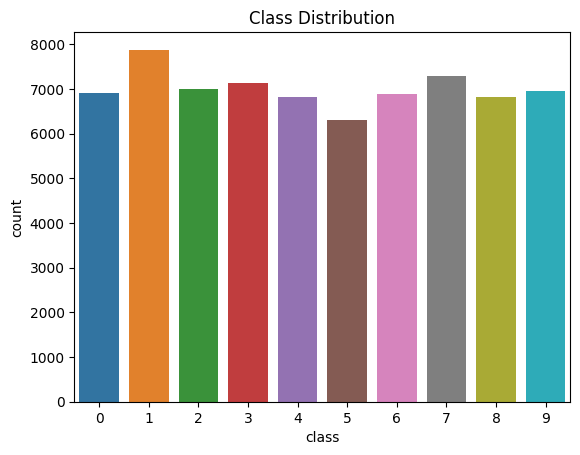

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Model Evaluation:
Accuracy: 0.9178571428571428
Precision: 0.9176311889392749
Recall: 0.9178571428571428
F1-Score: 0.9176827499615795

Confusion Matrix:
[[1289    1    6    0    5   14   12    6    8    2]
 [   0 1557    5    9    2    7    0    3   15    2]
 [   4   20 1229   25   16    8   19   15   35    9]
 [   6    7   30 1298    1   38    4   14   19   16]
 [   4    0    8    5 1194    4   13    6   12   49]
 [   7   11    8   53   16 1087   20    2   54   15]
 [   7    3   20    0   14   14 1332    2    4    0]
 [   5    4   28    4    8    5    0 1408    2   39]
 [  11   24   17   38    7   39   12   10 1186   13]
 [   7   10    7   14   40    5    0   45   22 1270]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Cross-Validation Scores: [0.91971429 0.92092857 0.91464286 0.91635714 0.92878571]
Mean CV Score: 0.9200857142857142


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


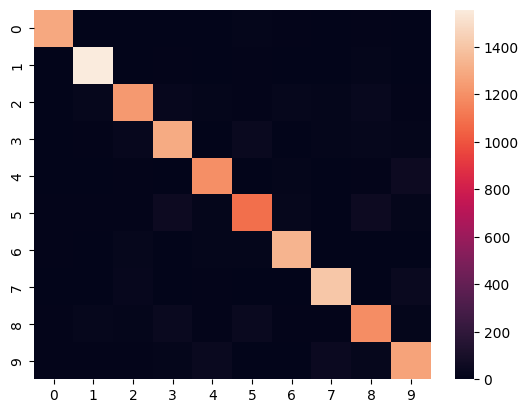

In [ ]:
X, y = mnist['data'], mnist['target'].astype(int)

# Data Inspection
print("Dataset Size:", X.shape)
print("Number of Classes:", len(np.unique(y)))
print("\nData Types:")
print(X.dtypes)
print("\nFirst Few Rows:")
print(X.head())

# Data Visualization
sns.countplot(x=y)
plt.title('Class Distribution')
plt.show()

# Model Building and Training
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=100)

# Train the model
model.fit(X_train, y_train)

# Model Evaluation
# Predictions on the test set
y_pred = model.predict(X_test)

# Accuracy, Precision, Recall, F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nModel Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)
sns.heatmap(conf_matrix)

# Parameter Tuning and Optimization
# Hyperparameter Tuning using cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print("\nCross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# Feature Selection

sfm = SelectFromModel(model)
sfm.fit(X_train, y_train)
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

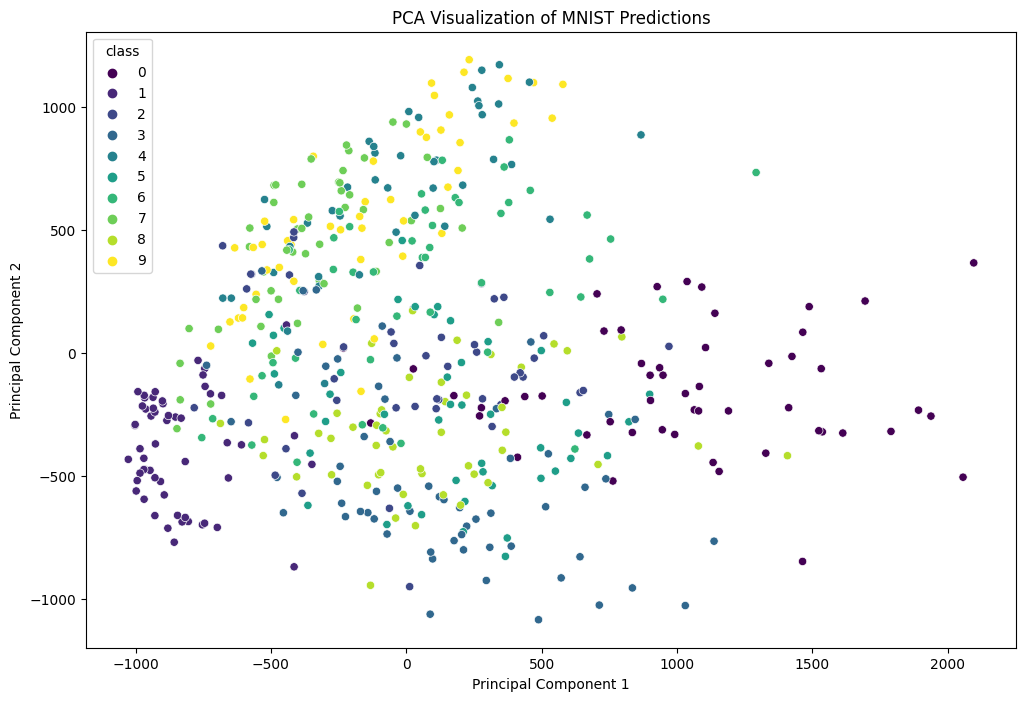

In [ ]:
subset_size = 500
X_subset = X_test[:subset_size]
y_subset = y_test[:subset_size]

#pca
pca = PCA(n_components=2)
X_subset_pca = pca.fit_transform(X_subset)

# 2d plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_subset_pca[:, 0], y=X_subset_pca[:, 1], hue=y_subset, palette='viridis', legend='full')
plt.title('PCA Visualization of MNIST Predictions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# IRIS Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

In [ ]:
# Load the IRIS dataset
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

Dataset Size: (150, 5)

Data Types:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target               float64
dtype: object

First Few Rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


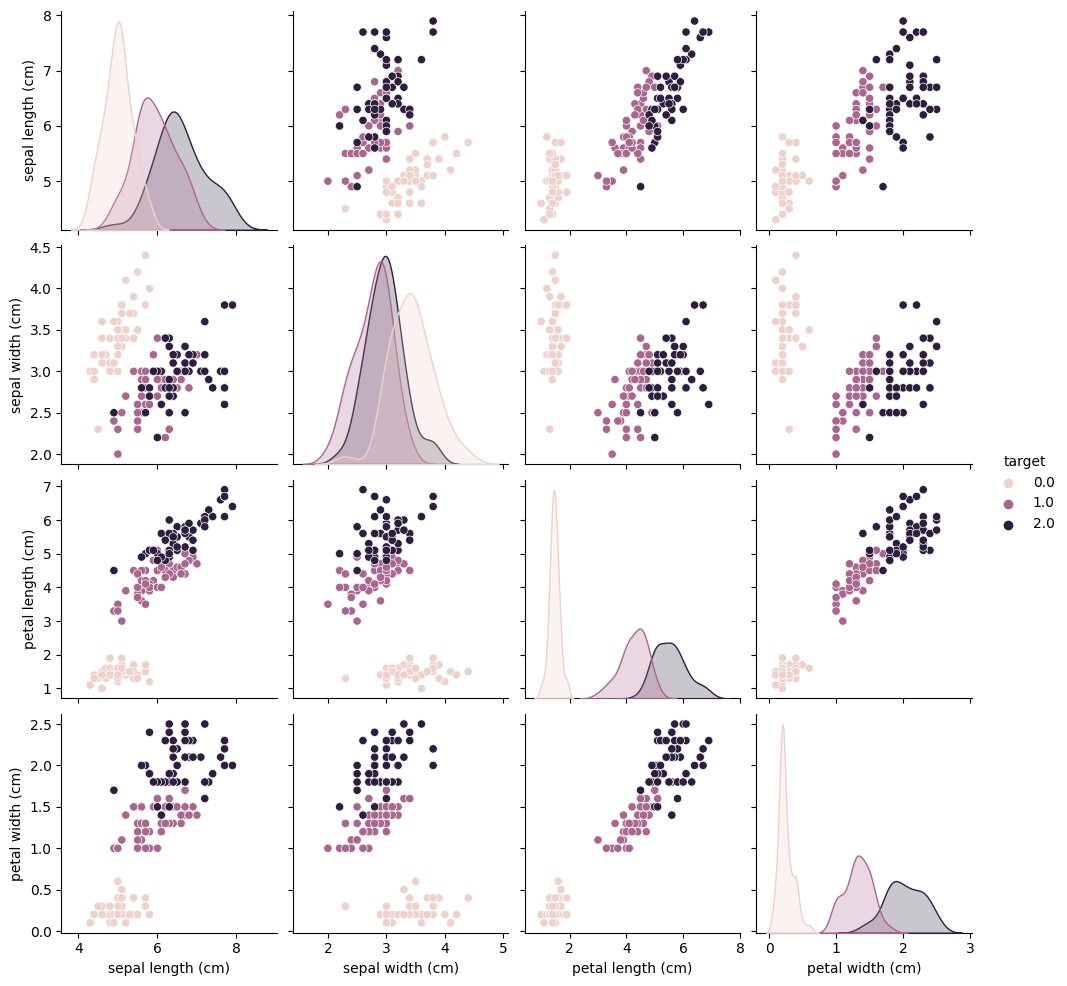

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Model Evaluation:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Cross-Validation Scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean CV Score: 0.9733333333333334

Feature Importance:
sepal length (cm): -0.397222221541368
sepal width (cm): 0.9607879762786776
petal length (cm): -2.3739577933718077
petal width (cm): -1.003291726517889

Selected Features:
Index(['petal length (cm)', 'petal width (cm)'], dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Data Inspection
print("Dataset Size:", iris_df.shape)
print("\nData Types:")
print(iris_df.dtypes)
print("\nFirst Few Rows:")
print(iris_df.head())

# Data Visualization
sns.pairplot(iris_df, hue='target', diag_kind='kde')
plt.show()

# Model Building and Training
# Split the data into features (X) and target variable (y)
X = iris_df.drop('target', axis=1)
y = iris_df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Model Evaluation
# Predictions on the test set
y_pred = model.predict(X_test)

# Accuracy, Precision, Recall, F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nModel Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Parameter Tuning and Optimization
# Hyperparameter Tuning using cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print("\nCross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

feature_importance = model.coef_[0]
print("\nFeature Importance:")
for i, imp in enumerate(feature_importance):
    print(f"{X.columns[i]}: {imp}")

# Select relevant features based on importance
sfm = SelectFromModel(model)
sfm.fit(X_train, y_train)
selected_features = X.columns[sfm.get_support()]
print("\nSelected Features:")
print(selected_features)

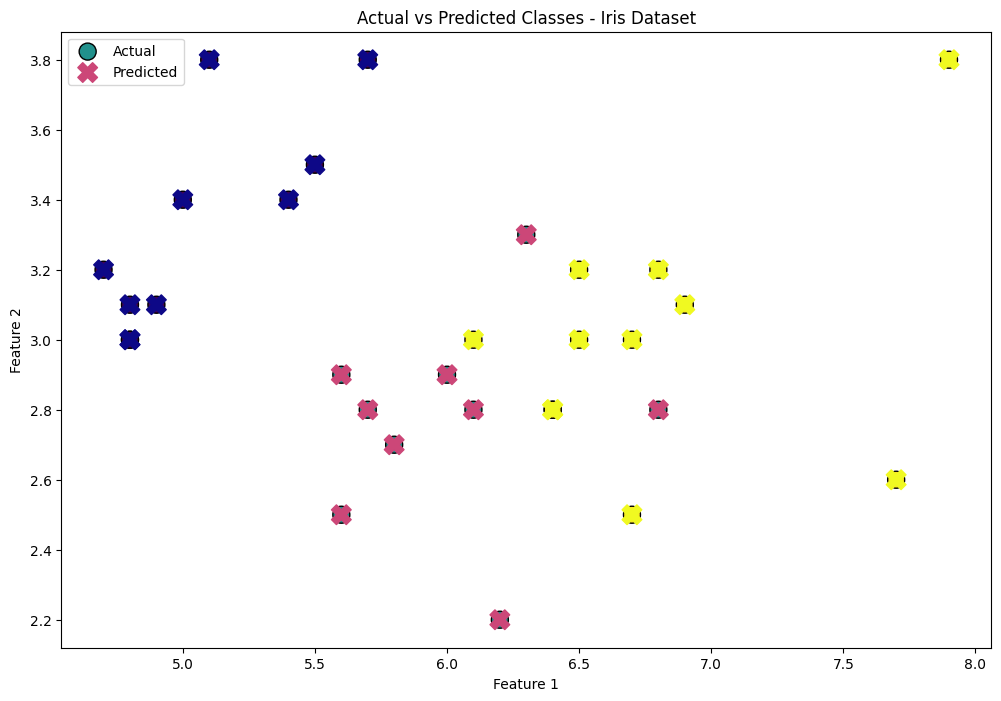

In [ ]:
# Visualizing Results for Iris dataset
X_subset_iris = X_test.iloc[:30, :]
y_subset_iris = y_test[:30]

# Predictions on the subset
y_pred_iris = model.predict(X_subset_iris)

# Plot the results
plt.figure(figsize=(12, 8))

# Plot actual classes
plt.scatter(X_subset_iris.iloc[:, 0], X_subset_iris.iloc[:, 1], c=y_subset_iris, cmap='viridis', edgecolors='k', s=150, label='Actual')

# Plot predicted classes
plt.scatter(X_subset_iris.iloc[:, 0], X_subset_iris.iloc[:, 1], c=y_pred_iris, cmap='plasma', marker='X', s=200, label='Predicted')

plt.title('Actual vs Predicted Classes - Iris Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()